<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/metodo_de_newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Resolvendo equações da forma $f(u)=0$ numéricamente**

Resolver a equação $$f(x,y)=(f_1(x,y),f_2(x,y))=(0,0)$$ ou o sistema de equações
$$\begin{cases}
f_1(x,y)&=&0\\\\
f_2(x,y)&=&0\end{cases}.$$

Vamos usar as funções 
$$f_1(x,y)=2-6y^2+6xy^4+2x+6x^2+12x^3y^2+8x^3+6x^5$$ e 
$$f_2(x,y)=6y^5-8y^3+2y-12xy+12x^2y^3+6x^4y.
\tag{Equação}$$

Primeiro vamos definir as funções na linguagem que estamos usando. Aqui é a linguagem R.

In [ ]:
f1<-function(u){   # Definição de f1
x=u[1]
y=u[2]
return(2-6*y^2+6*x*y^4+2*x+6*x^2+12*x^3*y^2+8*x^3+6*x^5)
}

f2<-function(u){   # Definição de f2
x=u[1]
y=u[2]
p=6*y^5-8*y^3+2*y-12*x*y+12*x^2*y^3+6*x^4*y
return(p)
}

f<-function(u){      # Definição de função f(u), para resolver a equação f(u)=0, 
c( f1(u), f2(u))     # com u=(x,y).
}

Agora vamos fazer os graficos das curvas implícitas $f_1(x,y)=0$ e $f_2(x,y)=0$.

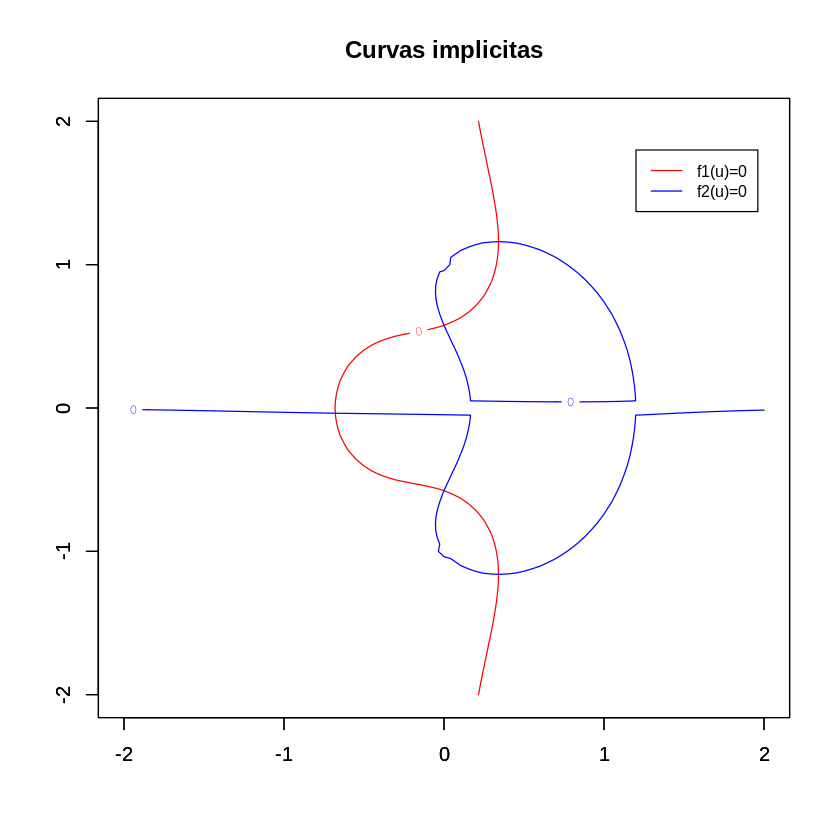

In [ ]:
xx <- seq(-2,2, by=0.05)
yy <- seq(-2,2,by=0.05) 
z=matrix(0,length(xx),length(yy))
for ( i in 1:length(xx)){
for ( j in 1:length(yy)){z[i,j]=f1(c(xx[i],yy[j]))}}

contour(xx,yy,z,level=0,col="red") # Curva f_1(x,y)=0
par(new=TRUE)

zz=matrix(0,length(xx),length(yy))
for ( i in 1:length(xx)){
for ( j in 1:length(yy)){zz[i,j]=f2(c(xx[i],yy[j]))}}

contour(xx,yy,zz,level=0,col="blue",main="Curvas implicitas") # Curva f_1(x,y)=0
legend(1.2,1.8, legend=c("f1(u)=0", "f2(u)=0"), col=c("red","blue"), lty=c(1,1), cex=0.8)

Para a resolução da equação $f(x,y)=(0,0)$, vamos usar o valor mínnimo da função 
$$g(u)=\frac{\|f(u)\|^2}{2}=f(u)\cdot f(u),$$ em que $u=(x,y)$, $\cdot$ denota o produto escalar usual  de $\mathbb{R}^2$.

In [ ]:
g<-function(u){
t(f(u)) %*% f(u)/2
} 

É claro que $$\min_ug(u)=0⟺f(u)=0.$$

Isso nos diz que a resolução da equação $f(u)=0$ pode ser vista como um problema de otimização.

E para determinarmos uma solução do problema de minimização 
$$\min_ug(u)=0,$$ vamos usar equações diferenciais para escolher direções em que a função $g(u)$ decresce, quando escolhemos um ponto inicial $u_0$ (uma aproximação inicial para a solução).

Vamos usar a equação diferencial ordinária
$$\begin{cases}Jf(u(t))u'(t)&=&-f(u(t))\\\\u(0)&=&(1,1)\end{cases},\tag{1}$$ nesse exemplo. A escolha da condição inicial $u(0)$ foi feita observando as curvas implícitas apresentadas acima.

Observe que, pela regar da cadeia, vale
$$\frac{d\,g(u(t))}{dt}=\nabla g(t)\cdot u'(t)=\left(Jf(u(t))^*f(u(t))\right)\cdot u'(t).$$
Então $$\frac{d\,g(u(t))}{dt}=\left(Jf(u(t))^*f(u(t))\right)\cdot \left(-[Jf(u(t)]^{-1}f(u(t))\right)=f(u(t))\cdot \left(-Jf(u(t))[Jf(u(t)]^{-1}f(u(t))\right)=-f(u(t))\cdot f(u(t))=-g(u(t)).$$ 

O que nos dá a igualdade
$$\frac{d\,g(u(t))}{dt}=-f(u(t))\cdot f(u(t))=-2g(u(t))$$ ou 
$$g(u(t))=g(u(0))e^{-2t},$$ que nos diz que $g(u(t))$ decresce, quando $g(u(0))\neq 0$.
 
 
 

In [ ]:
Jf<-function(u){  # Jf(u) é matriz do jacobiano de f(u).
x=u[1];y=u[2]
p=matrix(0,2,2)
df1=c(6*y^4+2+12*x+36*x^2*y^2+24*x^2+30*x^4, -12*y+24*x*y^3+24*x^3*y)
df2=c( -12*y+24*x*y^3+24*x^3*y, 30*y^4-24*y^2+2-12*x+36*x^2*y^2+6*x^4 )
p[1,]=df1
p[2,]=df2
p
}

gradg<-function(u){  # vetor gradiente de g(u).
p=t(Jf(u))%*%f(u)
t(p)
}

Para resolver numéricamente a equação diferencial ordinária $(1)$, vamos usar o [método de Euler](https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Euler) 
para resolver a equação diferencial ordinária 
$$\begin{cases}u'(t)&=&F(t,u(t))\\
u(t_0)&=&u_0\end{cases}.$$

Cabe lembrar que a ideia é usar o [polinômio de  Taylor de ordem 1](https://pt.wikipedia.org/wiki/Teorema_de_Taylor) para escrever $$u(t+h)=u(t)+hu'(t)+\frac{h^2}{2}u'(\chi), $$ e obter a aproximação para $$u(t_0+jh)\approx u_j$$ por meio da relação de recorrência
$$u_{j+1}=u_j+hF(t_j,u_j),$$ em que $$t_j=t_0+jh.$$

No nosso exemplo temos $$F(t,u)=-\left[Jf(u)\right]^{-1}f(u),$$ e o método de Euler toma da relação de recorrência 
$$\begin{cases}Jf(u_j)w_j&=&-f(u_j)\\u_{j+1}=u_j+w_j\end{cases},$$ para evitar o cálculo da matriz inversa $\left[Jf(u)\right]^{-1}$. 

In [ ]:
ZeroEuler<-function(u0,t,n){ # Método de Euler resolver numéricamente a Equação Jf(u(t))u'(t)=- f(u(t))
u=matrix(0,2,n+1)
u[,1]=u0
tj=t/n
for (i in 1:n){
h=solve( Jf(u[,i]),-tj*f(u[,i]))    # Resolve o sistema linear Jf(u)h=-tj f(u)
u[,i+1]=u[,i]+h}
u
}

Vamos utilizar $h=1$ e fazer $n=6$ iterações. <font color=blue> Observe que nesse caso faremos $n$ terações do [método de Newton](https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Newton%E2%80%93Raphson).

[1] "Resultado pelo metodo de Newton"
[1] "Valor da raiz u="
[1] 0.3411639 1.1615414
[1] "Valor de f(u)="
[1] 2.138216e-11 3.452021e-11
[1] "Valor de g(u)="
[1] 8.244207e-22


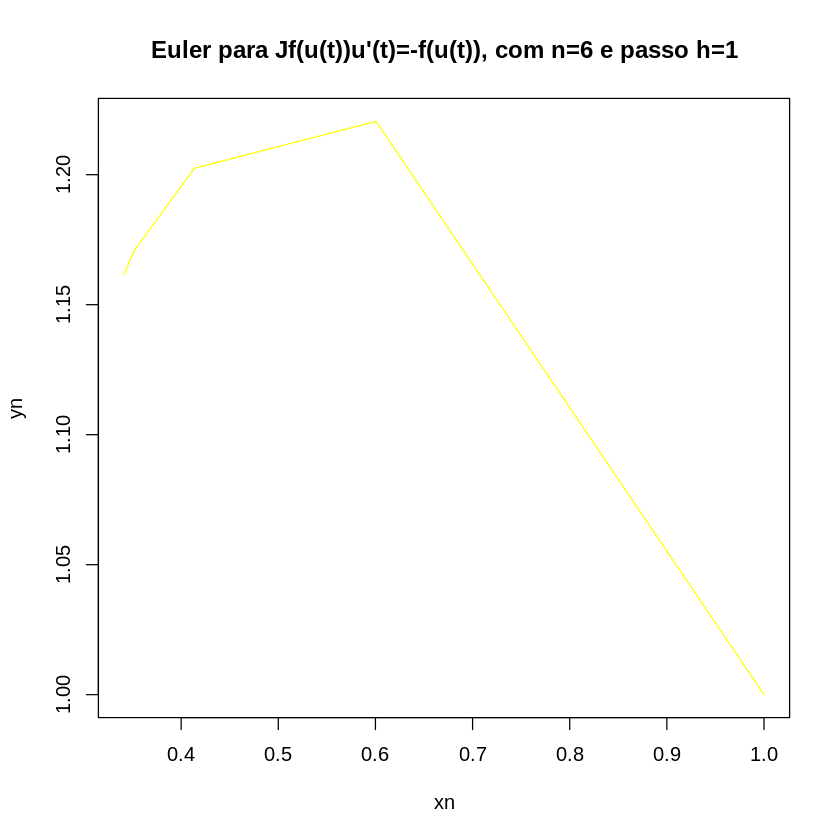

In [ ]:
print("Resultado pelo metodo de Newton")
u0=c(1,1); t=6; n = 6            # tamanho de passo tj=1.
u=ZeroEuler(u0,t,n) 
print("Valor da raiz u="); print(u [,n+1])    # Aproximadamente u(6)
print("Valor de f(u)="); print(f(u[,n+1]))
print("Valor de g(u)="); print(g(u[,n+1])[1,1])

xn=u[1,]; yn=u[2,]
plot(xn,yn,'l',col="yellow", main="Euler para Jf(u(t))u'(t)=-f(u(t)), com n=6 e passo h=1")

#**O método de Euler-Gradiente**

Quando supeitarmos que a matriz $Jf(u)$ não possui inversa em algum ponto de interesse, podemos usar a equação diferencial ordinária
$$\begin{cases}u'(t)&=&-\nabla g(u(t))\\\\u(0)&=&(1,1)\end{cases},\tag{2}$$ nesse exemplo, em que $$\nabla g(u)=\left[Jf(u)\right]^*f(u),$$ sendo $\left[Jf(u)\right]^*$ a matriz transposta de $Jf(u)$. A escolha da condição inicial $u(0)$ também foi feita observando as curvas implícitas apresentadas acima.

Observe que, pela regar da cadeia, vale
$$\frac{d\,g(u(t))}{dt}=\nabla g(t)\cdot u'(t)=-\nabla g(t)\cdot \nabla g(t)=-\|\nabla g(t)\|^2\leq 0.$$
Então $g(u(t))$ decresce, quando $\nabla g(u(t))\neq 0$, ou seja, quando $u(t)$ não for ponto crítico.
 
 
 

Para resolver numéricamente a equação diferencial ordinária $(2)$, vamos usar o [método de Euler](https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Euler) também.

Note que agora o referido método toma a forma da relação de recorrência 
$$u_{j+1}=u_j-h\nabla g(u_j),$$ que tem relação com o [método dos gradientes](https://pt.wikipedia.org/wiki/M%C3%A9todo_do_gradiente).

In [ ]:
ZeroEuler<-function(u0,t,n){ 
u=matrix(0,2,n+1)
u[,1]=u0
h=t/n
for (i in 1:n){
u[,i+1]=u[,i]-h*gradg(u[,i])}
u
}

Esse método é mais lento, por isso vamos tomar $n=100000$ e $h=6/n$, para obter uma aproximação para $u_n\approx u(6)$.

[1] "Resulado pelo metodo dos gradientes "
[1] "Valor da raiz u="
[1] 0.3411639 1.1615414
[1] "Valor de f(u)="
[1] -1.726744e-14 -6.986078e-14
[1] "Valor de g(u)="
[1] 2.589347e-27


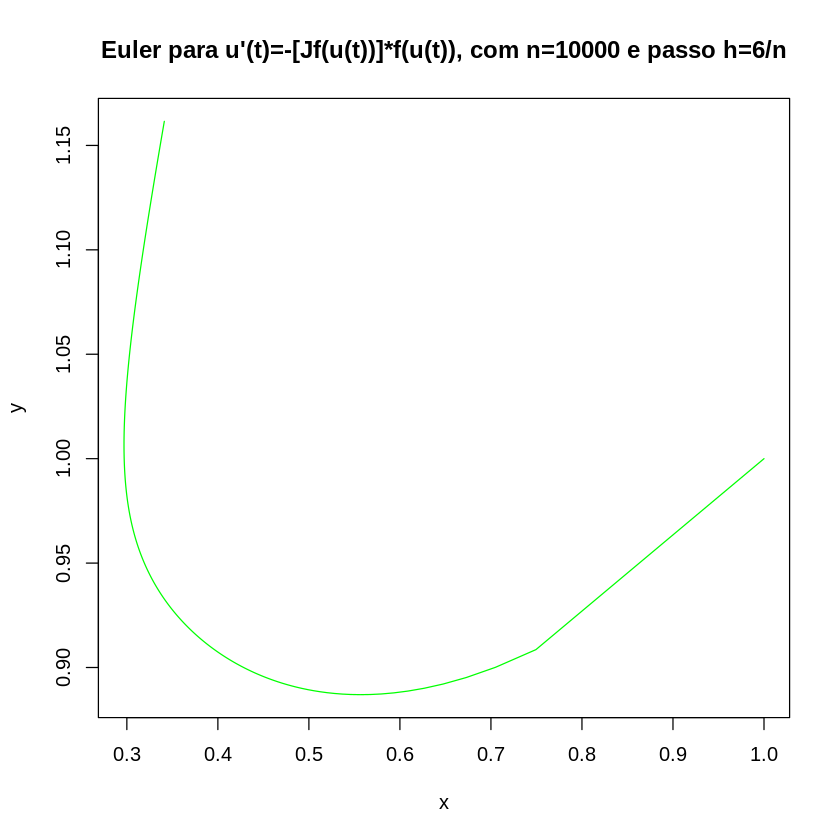

In [ ]:
print("Resulado pelo metodo dos gradientes ")
u0=c(1,1); t=6; n = 100000        # Note que aqui é necessário que o passo tj seja bem pequeno.
u=ZeroEuler(u0,t,n) 
print("Valor da raiz u="); print(u [,n+1])    # Aproximadamente u(6)
print("Valor de f(u)="); print(f(u[,n+1]))
print("Valor de g(u)="); print(g(u[,n+1])[1,1])


x=u[1,]; y=u[2,]
plot(x,y,col="green",'l',main="Euler para u'(t)=-[Jf(u(t))]*f(u(t)), com n=10000 e passo h=6/n")

Observamos que $f(u_n)$ e $g(u_n)$ estão bem proximas de serem nulos.

Terminamos com um gráfico das curvas implícitas dadas pela equação do exemplo e pelas trajetórias dadas pelas equações diferenciais $(1)$ e $(2)$.

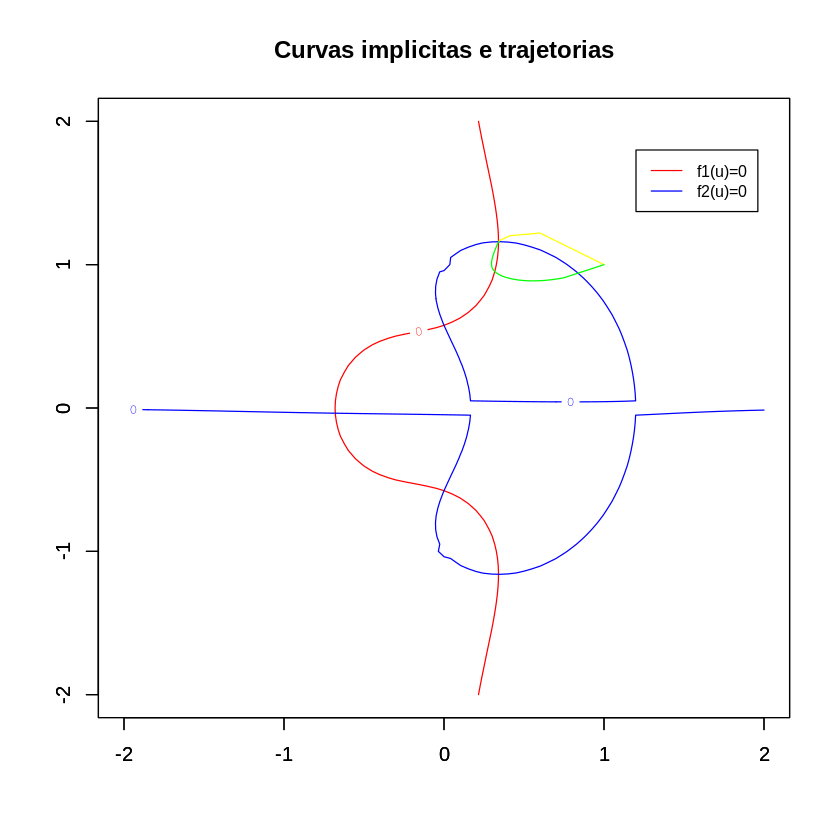

In [ ]:
contour(xx,yy,z,level=0,col="red")
par(new=TRUE)

contour(xx,yy,zz,level=0,col="blue",main="Curvas implicitas e trajetorias")
legend(1.2,1.8, legend=c("f1(u)=0", "f2(u)=0"),
       col=c("red","blue"), lty=c(1,1), cex=0.8)
par(new=TRUE)
points(xn,yn,'l',col="yellow", main="Euler para Jf(u(t))u'(t)=-f(u(t)), com n=6 e passo h=1")
points(x,y,'l',col="green", main="Euler para Jf(u(t))u'(t)=-f(u(t)), com n=6 e passo h=1")